# Pi : Monte Carlo Method

This article estimates the value of Pi, using Monte Carlo Method. Monte Carlo Methods are a class of computational algorithm that rely on repeated random sampling to obtain numerical results. The basic idea of these algorithms is to use randomness to solve problems that might be deterministic in principle.


## Experiment Setup

To estimate value of Pi using Monte Carlo Method. We use the following setup


We have a square cardboard of area 1 unit squared.

We draw a quater of a circle with radius = 1 unit and center = (0,0) on this cardboard.

We (randomly) throw darts at the cardboard.

As the darts are thrown randomly, it is safe to assume that,


$$\frac{number \ of \ darts \  inside \  the \  quarter \  circle}{total \  number \  of \  darts}=\frac{area \  of \  quarter \  circle}{area \  of \  square}$$


We can use this relationship to estimate the value of Pi.

$$\frac{number \ of \ darts \  inside \  the \  quarter \  circle}{total \  number \  of \  darts}=\frac{\frac{\pi 1 ^2}{4}}{1^2}$$


$$\frac{4 * number \ of \ darts \  inside \  the \  quarter \  circle}{total \  number \  of \  darts}=\pi$$


## Python program

In [156]:
from random import random
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import math

def runExperiment(darts, output = False):
    #Generate random dart throws
    dartThrows = []

    for i in xrange(darts):
        #Generate random x and y co-ordinates
        randX = random()
        randY = random()

        dartThrows.append((randX, randY))

    #Finding number of darts inside the circle
    count = 0
    for xCord, yCord in dartThrows:
        if(math.pow((xCord - 0),2) + math.pow((yCord - 0),2) <= math.pow(1.0,2)):
            count += 1
            
    #Estimating value of Pi
    
    pi = 4.0 * count/darts

    if(output):
        dartThrows
        #Plotting the Dart Throws 
        circle = plt.Circle((0, 0), 1, color = 'r' ,alpha=.5)

        fig = plt.gcf()
        ax = fig.gca()
        ax.add_patch(circle)
        plt.scatter(*zip(*dartThrows))
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.show()
        
        #Printing Pi estimate
        print "Number of Dart Throws inside the circle = ", count
        print "Total Number of Dart Throws = ", darts
        print "Estimated value of Pi = ", pi
        
        #Return nothing
        return
    
    #Return Pi estimate
    return pi

**Let's run the experiment of 1000 dart throws and check the results.**

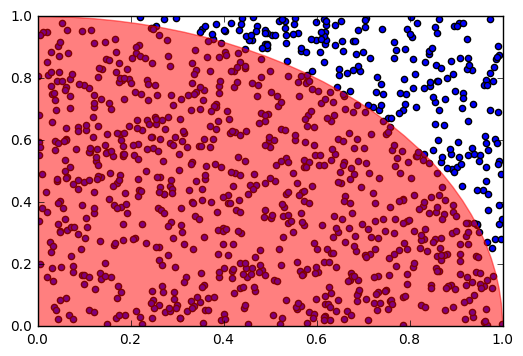

Number of Dart Throws inside the circle =  790
Total Number of Dart Throws =  1000
Estimated value of Pi =  3.16


In [152]:
runExperiment(1000, True)

**The python code works as expected. Let's investigate the relationship between the number of darts and error. The value of Pi to calculate error is taken as 3.14159 **

   Dart Throws  Pi Estimate     Error
0        100.0     3.280000  0.138410
1       1000.0     3.160000  0.018410
2      10000.0     3.174000  0.032410
3     100000.0     3.139280  0.002310
4    1000000.0     3.142664  0.001074
5   10000000.0     3.141487  0.000103


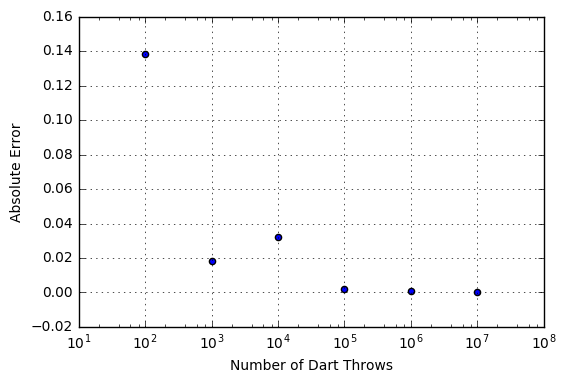

In [177]:
iterationList = [100,1000, 10000, 100000, 1000000, 10000000]

result = DataFrame(columns=('Dart Throws', 'Pi Estimate', 'Error'))

for i in iterationList:
    piEstimate = runExperiment(i)
    result.loc[len(result)] = [i, piEstimate, abs(3.14159 - piEstimate)]
    
print result

plt.scatter(result['Dart Throws'].tolist(), result['Error'].tolist())
plt.xscale('log')
plt.xlabel('Number of Dart Throws')
plt.yscale('linear')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

**For higher number of darts we get accurate Pi estimate upto 3 decimal places.**

Reference - 
[https://en.wikipedia.org/wiki/Monte_Carlo_method](https://en.wikipedia.org/wiki/Monte_Carlo_method)
